# Budget

In [85]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

tn_budgets = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)
tn_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [2]:
#tn_budgets["domestic_gross"]=tn_budgets["domestic_gross"].apply(lambda x: x.replace("$",""))

In [3]:
#tn_budgets["domestic_gross"]=tn_budgets["domestic_gross"].apply(lambda x: x.replace(",","").replace("$",""))

In [4]:
#tn_budgets.columns

In [86]:
columns =  ['production_budget', 'domestic_gross','worldwide_gross']

In [87]:
def cleaning(columns):
    for x in columns:
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

In [88]:
cleaning(columns)

In [8]:
#tn_budgets['worldwide_gross'].head(10)

In [9]:
# """
# def to_int():
#     for x in ['production_budget', 'domestic_gross','worldwide_gross']:
#         tn_budgets[x]=pd.to_numeric(tn_budgets[x])
#     return 
# """

In [10]:
# tn_budgets["domestic_gross"]

In [11]:
# tn_budgets.sort_values(by="domestic_gross", ascending=False).head(10)

In [12]:
#tn_budgets["total_gross"]=tn_budgets["domestic_gross"]+tn_budgets["worldwide_gross"]

In [89]:
tn_budgets["earnings"]=tn_budgets["worldwide_gross"]-tn_budgets["production_budget"]
tn_budgets.sort_values(by="earnings", ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,earnings
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224


In [90]:
tn_budgets["Profit"]=(tn_budgets["earnings"]/tn_budgets["worldwide_gross"])*100

In [92]:
tp=tn_budgets.sort_values(by="earnings", ascending=False).head(10).copy()
MovieID = ["A","B","C","D","E","F","G","H","I","J"]
tp["Movie ID"]= MovieID
tp

,release_date,movie,production_budget,domestic_gross,worldwide_gross,earnings,Profit,Movie ID
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,84.692106,A
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,90.942884,B
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,85.352522,C
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,85.097242,D
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,86.960647,E
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,87.489488,F
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,85.177240,G
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,90.683414,H
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,85.166046,I


In [109]:
#this is to work with matplotlib
tp = tp.sort_values(by="earnings", ascending=False)
topten = tp.loc[:,["Movie ID","production_budget", "worldwide_gross"]]
topten = topten.set_index("Movie ID")

In [110]:
#this is to work with seaborn
stopten = topten.stack().reset_index()
stopten.columns = ['Movie ID', 'Gross', 'USD']
stopten.head(3)

,Movie ID,Gross,USD
0,A,production_budget,425000000
1,A,worldwide_gross,2776345279
2,B,production_budget,200000000


In [16]:
#name_movies = list(topten["movie"].values)
#name_movies

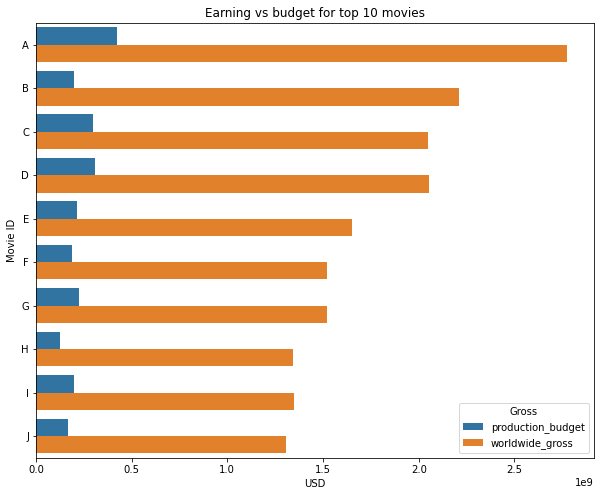

In [122]:
#seaborn.barplot(data=topten)
fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(y ="Movie ID", x ="USD", hue="Gross", data = stopten)
#plt.xticks(rotation=60)
plt.title("Earning vs budget for top 10 movies")
plt.show()

In [113]:
# DataFrame to explain what is A, B, C etc
genres_tp=["Action, Adventure, Sci-fi, Fantasy", "Drama",  "Action, Sci-fi",
           "Action, Sci-fi-, Adventure, Fantasy", "Action, Sci-fi-, Thriller, Adventure",
           "Action, Adventure", "Action, Fantasy, Adventure, Sci-fi", "Adventure, Fantasy, Mystery, Drama",
          "Action, Fantasy, Adventure, Sci-fi", "Action, Adventure, Sci-Fi"]
director_tp=["James Cameron", "James Cameron", "Anthony Russo, Joe Russo", "J.J. Abrams", "Colin Trevorrow",
            "James Wan", "Joss Whedon", "David Yates", "Ryan Coogler", "J.A. Bayona"]
title = list(tp["movie"])
ID_df=pd.DataFrame(zip(MovieID,title,genres_tp, director_tp), columns = ["MovieID", "Title", "Genre", "Director"])
ID_df.set_index("MovieID")

,Title,Genre,Director
MovieID,,,
A,Avatar,"Action, Adventure, Sci-fi, Fantasy",James Cameron
B,Titanic,Drama,James Cameron
C,Avengers: Infinity War,"Action, Sci-fi","Anthony Russo, Joe Russo"
D,Star Wars Ep. VII: The Force Awakens,"Action, Sci-fi-, Adventure, Fantasy",J.J. Abrams
E,Jurassic World,"Action, Sci-fi-, Thriller, Adventure",Colin Trevorrow
F,Furious 7,"Action, Adventure",James Wan
G,The Avengers,"Action, Fantasy, Adventure, Sci-fi",Joss Whedon
H,Harry Potter and the Deathly Hallows: Part II,"Adventure, Fantasy, Mystery, Drama",David Yates
I,Black Panther,"Action, Fantasy, Adventure, Sci-fi",Ryan Coogler


In [121]:
AB_df=pd.DataFrame(zip(MovieID,genres_tp), columns = ["MovieID", "Genre"])
AB_df.set_index("MovieID")

,Genre
MovieID,
A,"Action, Adventure, Sci-fi, Fantasy"
B,Drama
C,"Action, Sci-fi"
D,"Action, Sci-fi-, Adventure, Fantasy"
E,"Action, Sci-fi-, Thriller, Adventure"
F,"Action, Adventure"
G,"Action, Fantasy, Adventure, Sci-fi"
H,"Adventure, Fantasy, Mystery, Drama"
I,"Action, Fantasy, Adventure, Sci-fi"


Text(0.5, 1.0, 'Budget for each movie')

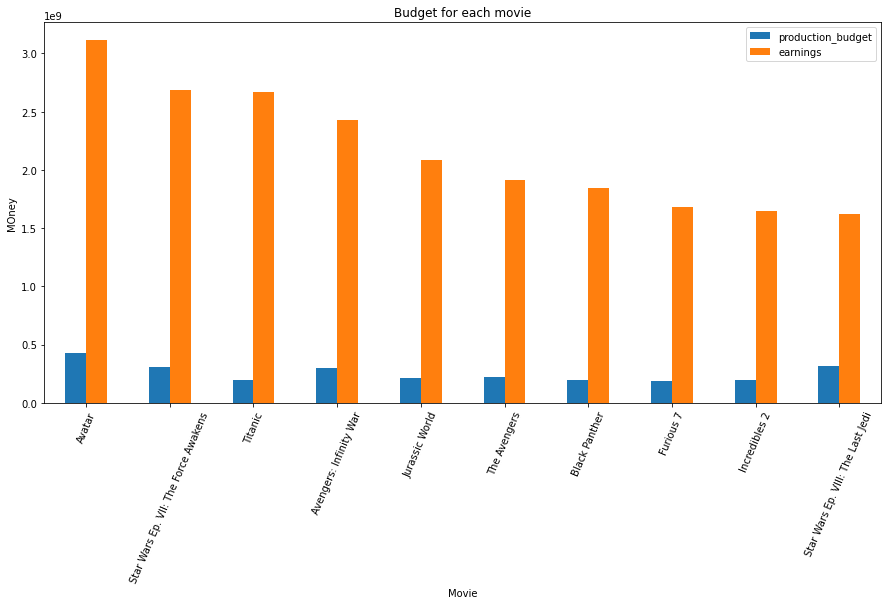

In [19]:
topten.plot.bar(figsize=(15,7))
plt.xticks(rotation=67)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')


# Gross


In [20]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [21]:
bom_gross["foreign_gross"].dropna(inplace=True)

In [22]:
bom_gross["foreign_gross"].isna().sum()

1350

In [23]:
bom_gross["foreign_gross"]

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [24]:
bom_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
rt_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t', index_col=0)
rt_info.head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
